### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  


### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')
def separador():
    print("\n" + "=" * 170 + "\n")
def header(Titulo):
  por=((170-len(Titulo))//10)
  a=int(1.2*por)
  print("."*a+"·"*a+"~"*a+"≈"*a+"≋"
  *int(por*.2),Titulo,"≋"*int(por*.2)
  +"≈"*a+"~"*a+"·"*a+"."*a,"\n\n")
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import math
import matplotlib.pyplot as plt
import seaborn as sns
#Se importan las librerias necesarias para la realización de esta actividad.

Mounted at /content/drive


#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual

✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.

In [2]:
#Se importa el archivo insurance, que supongo que es una base de datos de una aseguradora, sus tarifas e información de sus clientes.

df=pd.read_csv('/content/drive/MyDrive/Unidad04/insurance.csv')
header('Paso 1: Configuración Inicial')
print(f'La base de datos "insurance" es formato CSV, consta de {df.shape[0]} filas y {df.shape[1]} columnas');separador()
print(f'Las primeras filas son:\n{df.head()}');separador()
print(df.info());separador()
print(f'La descripción estadistica es la siguiente:\n\n{df.describe(include="all")}');separador()

................················~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Paso 1: Configuración Inicial ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~················................ 


La base de datos "insurance" es formato CSV, consta de 1338 filas y 7 columnas


Las primeras filas son:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

.............·············~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Paso 2: Analisis Exploratorio (EDA) en variables numéricas ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~·············............. 


Los tipos de datos del dataset son:

  Nombre de la columna     Tipo
0                  age    int64
1                  sex   object
2                  bmi  float64
3             children    int64
4               smoker   object
5               region   object
6              charges  float64

Se convirtieron las columnas "sex", "smoker" y "region" de object a categóricas:

  Nombre de la columna     Tipo
0                  age    int64
1                  sex   object
2                  bmi  float64
3             children    int64
4               smoker   object
5               region   object
6              charges  float64




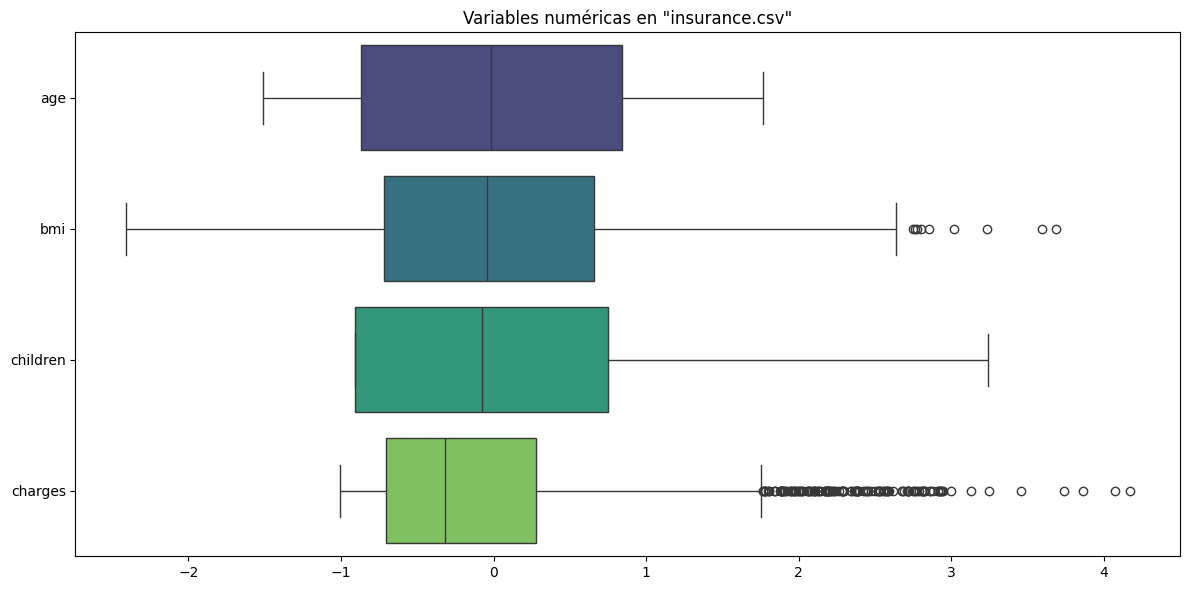

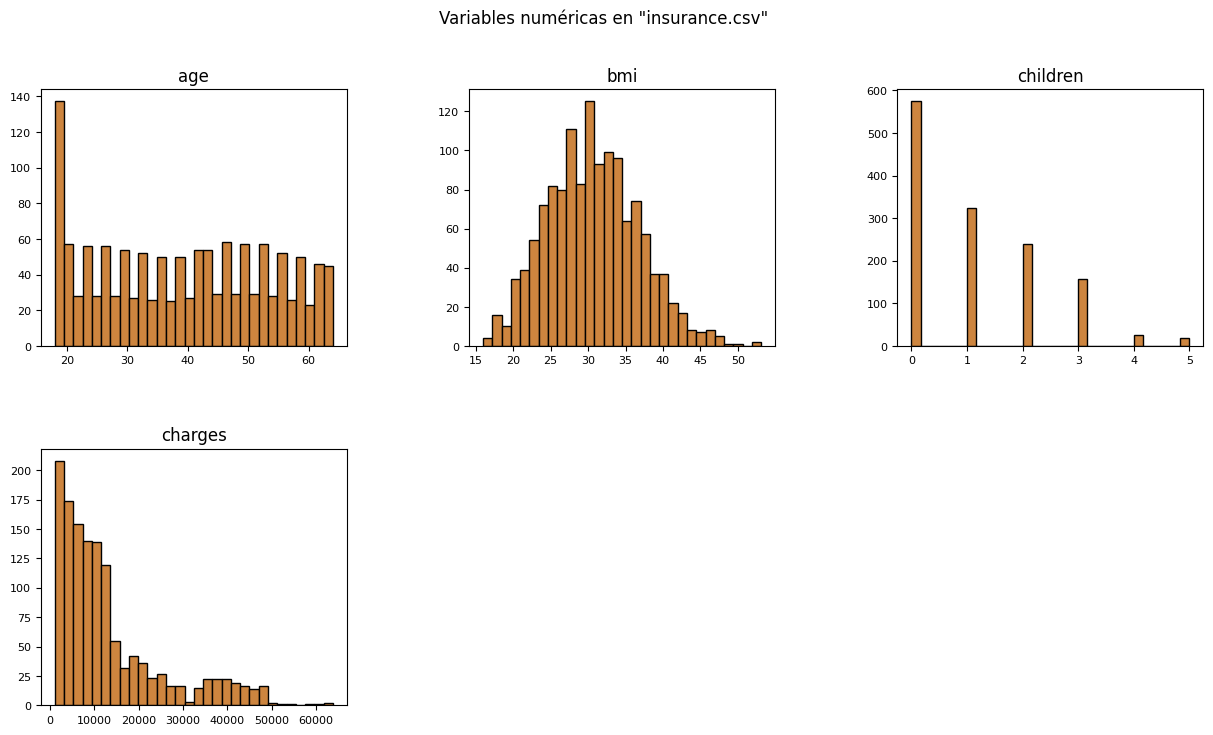



Calculo de la tendencia central y dispersion:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


.............·············~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Paso 2: Analisis Exploratorio (EDA) en variables categóricas ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~·············............. 




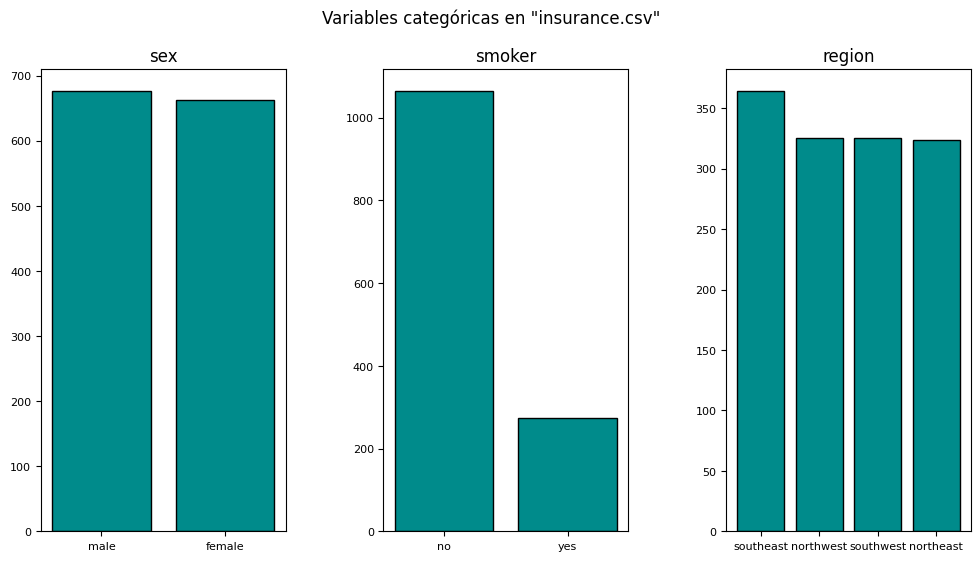

In [3]:
header('Paso 2: Analisis Exploratorio (EDA) en variables numéricas')
print('Los tipos de datos del dataset son:\n')
tipos=pd.DataFrame({'Tipo':df.dtypes});tipos.reset_index(inplace=True);tipos.columns=['Nombre de la columna', 'Tipo'];print(tipos)
#Como las columnas sexi, smoker y region eran object, hay que convertiras a categóricos.
df['sex']=df['sex'].astype('category')
df['smoker']=df['smoker'].astype('category')
df['region']=df['region'].astype('category')
print('\nSe convirtieron las columnas "sex", "smoker" y "region" de object a categóricas:\n');print(tipos);separador()

dfnum=df.select_dtypes(include=[np.number])#selecciono las columnas numéricas
plt.figure(figsize=(12,6))
dfscal=(dfnum-dfnum.mean())/dfnum.std()
sns.boxplot(data=dfscal, orient='h', palette='viridis')
plt.title('Variables numéricas en "insurance.csv"')
plt.tight_layout()
plt.show()
separador()

columnas=dfnum.columns.tolist()#Se crean los histogramas de la selección previa.
gridcol=3
gridfil=math.ceil(len(columnas)/gridcol)
fig=plt.figure(figsize=(5*gridcol,4*gridfil))
plt.suptitle('Variables numéricas en "insurance.csv"')
gs=gridspec.GridSpec(gridfil,gridcol,figure=fig, hspace=0.4, wspace=0.4)
for i, col in enumerate(columnas):
  ax=fig.add_subplot(gs[i])
  ax.hist(df[col].dropna(), bins=30, edgecolor='black', color='peru')
  ax.set_title(col)
  ax.tick_params(axis='both', labelsize=8)
plt.show()
separador()

print(f'Calculo de la tendencia central y dispersion:\n{dfnum.describe()}');separador()

header('Paso 2: Analisis Exploratorio (EDA) en variables categóricas') #se crean las graficas de barras para las categoricas
colcat=df.select_dtypes(include=['category']).columns.tolist()
fig=plt.figure(figsize=(12,6))
gs=gridspec.GridSpec(1,len(colcat),figure=fig, hspace=0.4, wspace=0.4)
plt.suptitle('Variables categóricas en "insurance.csv"')
for i, col in enumerate(colcat):
  ax=fig.add_subplot(gs[i])
  ax.bar(df[col].value_counts().index, df[col].value_counts().values, color='darkcyan', edgecolor='black')
  ax.set_title(col)
  ax.tick_params(axis='both', labelsize=8)
plt.show()



#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)?  

................················~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Paso 3: Matriz de correlación ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~················................ 


Matriz de correlacíon:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


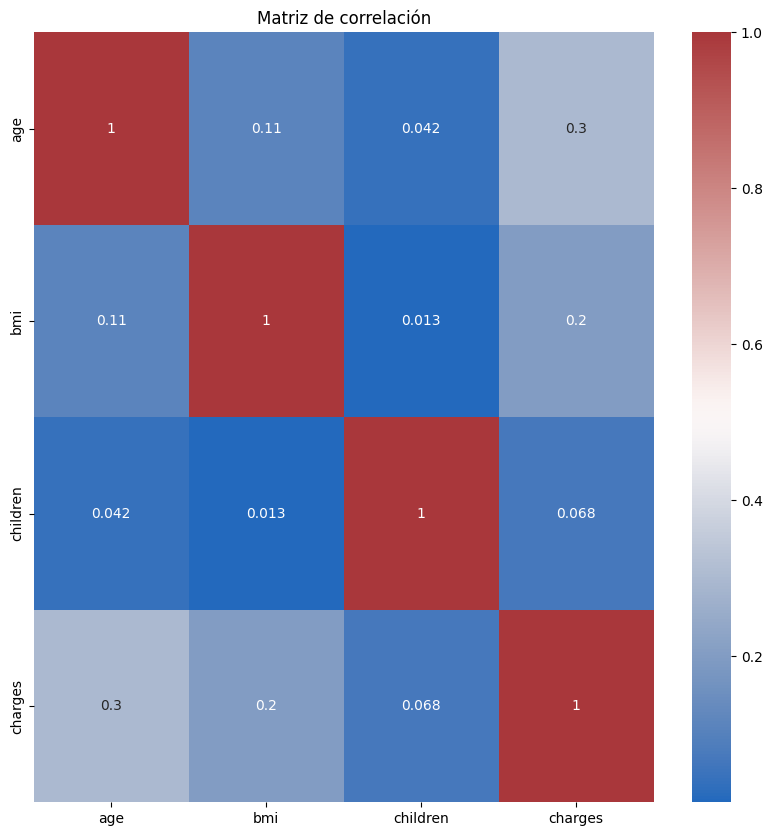


Las variable más correlacionadas con charges son: "age" y "bmi"




In [8]:
header('Paso 3: Matriz de correlación')
matriz=dfnum.corr()
print(f'Matriz de correlacíon:\n{matriz}')
plt.figure(figsize=(10,10))
sns.heatmap(matriz, annot=True, cmap='vlag')
plt.title('Matriz de correlación')
plt.show()
print('\nLas variable más correlacionadas con charges son: "age" y "bmi"');separador()


#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

In [5]:
header('Paso 4: Preprocesamiento')
from sklearn.preprocessing import OneHotEncoder
#cantidad de datos perdidos por columna incluyendo categóricas:
#print(df.describe(include='all')) #todas las columnas tienen 1338 valores. No hay faltantes
#Primero se estandarizan las numéricas para no afectar las categoricas despues del encoder:
def estandarizar(df):
  from sklearn.preprocessing import StandardScaler as scaler
  dfnum=((df.select_dtypes(include=[np.number])).columns)
  df[dfnum]=scaler().fit_transform(df[dfnum])

#ahora si se aplica el encoder
def encoder(df):
  print(f'Dataframe con columnas numéricas estandarizadas:\n\n{df.head()}')
  encoder_sex=OneHotEncoder(sparse_output=False, drop='first')
  sex_encoded=encoder_sex.fit_transform(df[['sex']])
  sex_cols=encoder_sex.get_feature_names_out(['sex'])

  encoder_smoker=OneHotEncoder(sparse_output=False, drop='first')
  smoker_encoded=encoder_smoker.fit_transform(df[['smoker']])
  smoker_cols=encoder_smoker.get_feature_names_out(['smoker'])

  encoder_region=OneHotEncoder(sparse_output=False, drop='first')
  region_encoded=encoder_region.fit_transform(df[['region']])
  region_cols=encoder_region.get_feature_names_out(['region'])

  df_sex=pd.DataFrame(sex_encoded, columns=sex_cols, index=df.index)
  df_smoker=pd.DataFrame(smoker_encoded, columns=smoker_cols, index=df.index)
  df_region=pd.DataFrame(region_encoded, columns=region_cols, index=df.index)

  df=pd.concat([df, df_sex, df_smoker, df_region], axis=1)
  df.drop(['sex', 'smoker', 'region'], axis=1, inplace=True)
  separador();print(f'Dataframe con las columnas numéricas estandarizadas y columnas categóricas codificadas con OneHotEncoder k-1:\n\n{df.head()}')
  return df
estandarizar(df);df=encoder(df)
#verificación de valores nulos
print(f'\nValores nulos:\n{df.isnull().sum()}\n{df.isna().sum()}')
print(df.dtypes)

................················~~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Paso 4: Preprocesamiento ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~~················................ 


Dataframe con columnas numéricas estandarizadas:

        age     sex       bmi  children smoker     region   charges
0 -1.438764  female -0.453320 -0.908614    yes  southwest  0.298584
1 -1.509965    male  0.509621 -0.078767     no  southeast -0.953689
2 -0.797954    male  0.383307  1.580926     no  southeast -0.728675
3 -0.441948    male -1.305531 -0.908614     no  northwest  0.719843
4 -0.513149    male -0.292556 -0.908614     no  northwest -0.776802


Dataframe con las columnas numéricas estandarizadas y columnas categóricas codificadas con OneHotEncoder k-1:

        age       bmi  children   charges  sex_male  smoker_yes  \
0 -1.438764 -0.453320 -0.908614  0.298584       0.0         1.0   
1 -1.509965  0.509621 -0.078767 -0.953689       1.0         0.0   
2 -0.797954  0.383307  1.580926 -0.728675       1.0         0.0   

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  


In [11]:
header('Paso 5: Modelado (Lasso y Ridge)')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

X=df.drop('charges', axis=1)#se separa la variable de interés
y=df['charges']#se selecciona la variable de interes
X_train=X
y_train=y
#X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.2, random_state=33)#se separan para entrenar
#se entrenan y se evalua su rendimiento con mse y r2.
lasso=Lasso(alpha=.1)
ridge=Ridge(alpha=1)

lasso.fit(X, y)
ridge.fit(X, y)

y_pred_lasso=lasso.predict(X)
y_pred_ridge=ridge.predict(X)

mse_lasso=mean_squared_error(y, y_pred_lasso)
r2_lasso=r2_score(y, y_pred_lasso)
mse_ridge=mean_squared_error(y, y_pred_ridge)
r2_ridge=r2_score(y, y_pred_ridge)

print(f'Resultados Lasso\n\nMSE:{mse_ridge}\nR2:{r2_lasso}\n\nCoeficientes:\n{pd.Series(lasso.coef_, index=X.columns)}');separador()
print(f'Resultados Ridge\n\nMSE:{mse_ridge}\nR2:{r2_ridge}\n\nCoeficientes:\n{pd.Series(ridge.coef_, index=X.columns)}')

...............···············~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Paso 5: Modelado (Lasso y Ridge) ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~···············............... 


Resultados Lasso

MSE:0.2491005766083892
R2:0.6670443632731002

Coeficientes:
age                 0.204545
bmi                 0.073949
children            0.000000
sex_male            0.000000
smoker_yes          1.348769
region_northwest   -0.000000
region_southeast    0.000000
region_southwest   -0.000000
dtype: float64


Resultados Ridge

MSE:0.2491005766083892
R2:0.7508994233916108

Coeficientes:
age                 0.297724
bmi                 0.170572
children            0.047340
sex_male           -0.010260
smoker_yes          1.960929
region_northwest   -0.028733
region_southeast   -0.084139
region_southwest   -0.078674
dtype: float64






   **Preguntas**

**- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?**

El modelo que tiene mejor R2 es el de Ridge que representa un 75% en comparación con Lasso que representa un 67%, esto es porque la penalización L2 de Ridge reduce la magnitud de los coeficientes que tienen poca relevancia en lugar de reducirlos a 0 como L1 De Lasso, esto le permite conservar un poco mas de información y explicar mejor la variabilidad, es decir un R2 mas alto

**- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?**

En el modelo de Lasso, las variables children, las del sexo y las de la región tienen coeficientes cercanos al 0, por que la penalización L1 de Lasso elimina o reduce a 0 las variables que no aportan información rleevante para predecir el costo del seguro. Dicho de otra forma,significa que el que numero de hijos, sexo y ubicacion de quien contrata no influye significativamente en el costo del seguro.

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad** (test de Breusch-Pagan).  
4. **Multicolinealidad** (VIF > 10 indica problema).  



...............···············~~~~~~~~~~~~~~~≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈≋≋ Paso 6: Verificación de Supuestos ≋≋≈≈≈≈≈≈≈≈≈≈≈≈≈≈≈~~~~~~~~~~~~~~~···············............... 




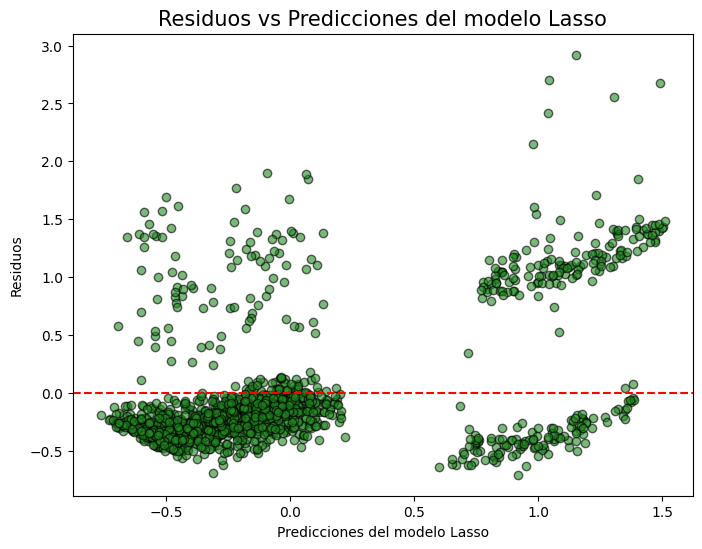

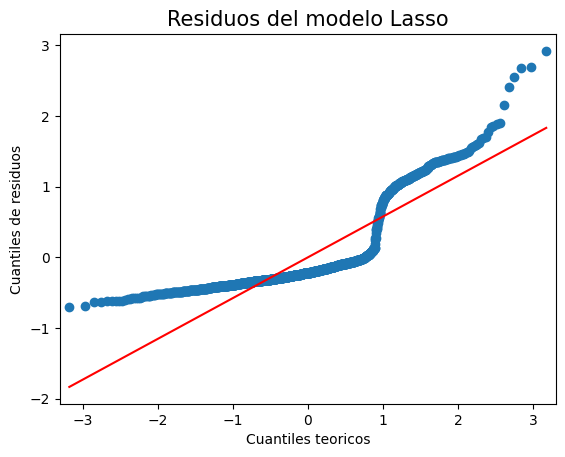

Test Shapiro-Wilk de residuo del modelo Lasso
Estadistico: 0.7272
p-valor:0.0000
Los residuos NO parecen seguir una distribucion normal


Test de Breusch-Pagan para Lasso
  LM-Estadistico: 328.4914
  Test-LM p-valor: 0.0000
  F-Estadistico: 54.0566
  Prueba-F p-valor: 0.0000

Variance Inflation Factor (VIF):
           Variable       VIF
0             const  5.428992
1               age  1.016822
2               bmi  1.106630
3          children  1.004011
4          sex_male  1.008900
5        smoker_yes  1.012074
6  region_northwest  1.518823
7  region_southeast  1.652230
8  region_southwest  1.529411




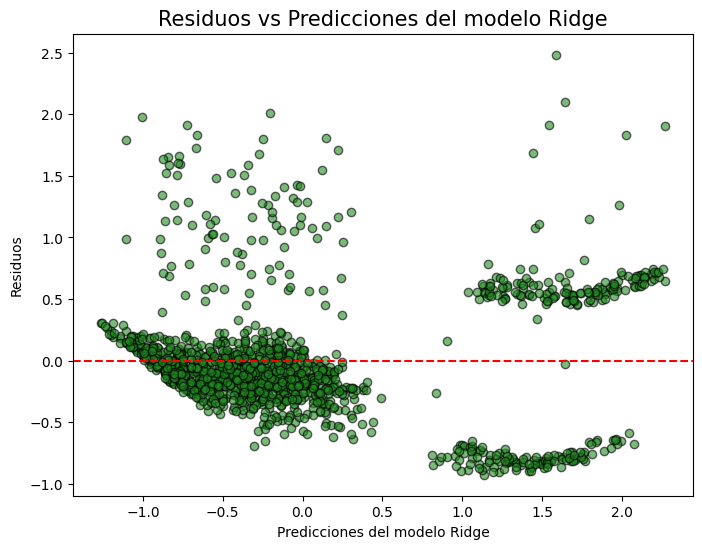

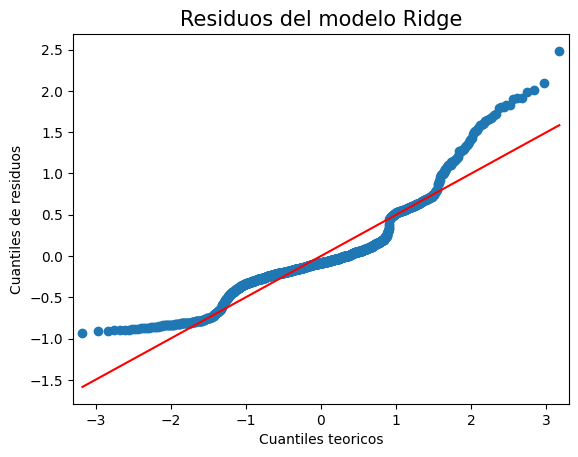

Test Shapiro-Wilk de residuo del modelo Ridge
Estadistico: 0.8980
p-valor:0.0000
Los residuos NO parecen seguir una distribucion normal


Test de Breusch-Pagan para Ridge
  LM-Estadistico: 328.4914
  Test-LM p-valor: 0.0000
  F-Estadistico: 54.0566
  Prueba-F p-valor: 0.0000

Variance Inflation Factor (VIF):
           Variable       VIF
0             const  5.428992
1               age  1.016822
2               bmi  1.106630
3          children  1.004011
4          sex_male  1.008900
5        smoker_yes  1.012074
6  region_northwest  1.518823
7  region_southeast  1.652230
8  region_southwest  1.529411




In [14]:
header('Paso 6: Verificación de Supuestos')
residuo_lasso=y-y_pred_lasso
residuo_ridge=y-y_pred_ridge
#funcion para verificar los supuestos.
def verificacion(pred,res,label):#linealidad
  plt.figure(figsize=(8,6))
  plt.scatter(pred, res, alpha=.6, edgecolors='k', color='forestgreen')
  plt.axhline(0, color='red', linestyle='--')
  plt.xlabel(f'Predicciones del modelo {label}')
  plt.ylabel('Residuos')
  plt.title(f'Residuos vs Predicciones del modelo {label}', size=15)
  plt.show()
  print('\n')
  fig=sm.qqplot(res, line='s', marker='o')
  plt.title(f'Residuos del modelo {label}', size=15)
  plt.xlabel('Cuantiles teoricos')
  plt.ylabel('Cuantiles de residuos')
  plt.show()
  print(f'Test Shapiro-Wilk de residuo del modelo {label}')#normalidad
  shapiro_stat, shapiro_p=shapiro(res)
  print(f'Estadistico: {shapiro_stat:.4f}\np-valor:{shapiro_p:.4f}')
  if shapiro_p>.5:
    print('Los residuos parecen seguir una distribución normal\n.')
  else:
    print('Los residuos NO parecen seguir una distribucion normal\n')
#homo o heterocedasticidad.
  X_const=sm.add_constant(X)
  bp_test=het_breuschpagan(residuo_lasso,X_const)
  labels=['LM-Estadistico', 'Test-LM p-valor','F-Estadistico', 'Prueba-F p-valor']
  print(f'\nTest de Breusch-Pagan para {label}')
  for name, value in zip(labels, bp_test):
    print(f'  {name}: {value:.4f}')
#multicolinealidad.
  vif_data=pd.DataFrame()
  vif_data['Variable']=X_const.columns
  vif_data['VIF']=[variance_inflation_factor(X_const.values,i) for i in range(X_const.shape[1])]
  print(f'\nVariance Inflation Factor (VIF):\n{vif_data}')
  separador()
verificacion(y_pred_lasso,residuo_lasso, 'Lasso')
verificacion(y_pred_ridge,residuo_ridge, 'Ridge')

📌 **Preguntas:**  
**- ¿Se cumplen los supuestos en ambos modelos?**

No se cumplen los supuestos. Ambos modelos presentan un p-valor de 0 en el test Shapiro-Wilk, lo que significa que no siguen una distribución normal. De la misma forma, en el test Breusch-Pagan los p-valores son de 0 también, lo que significa que presentan heterocedasticidad. En cambio, segun el VIF, ninguno presenta una colinealidad preocupante.

**- Si hay heterocedasticidad, ¿cómo podría solucionarse?**

La heterocedasticidad podría solucionarse aplicando una transformación como la logaritmica, para reducir la varianza en los datos y acercarla a la normalidad.

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
**- ¿Qué modelo es más interpretable?**

Considero que el modelo que es mas interpretable en este caso es el modelo Lasso, por su penalización L1 a las variables menos relacionadas dejandolas en 0 (children, sex, region), lo que facilita mucho la distinción de las que si son relevantes. En cambio el modelo Ridge con L2 reduce los coeficientes pero no los elimina.

**- ¿Cuál reduce mejor el sobreajuste?**

Al igual que en la pregunta anterior, considero que el modelo Lasso reduce mejor el sobreajuste. ElR2 es de .699 vs los .662 del modelo Ridge, lo que significa que Lasso explica mas variabilidad en los datos. De igual forma, el modelo Lasso (L1) es mas severo con las variables irrelevantes y al reducir drasticamente los coeficientes queda un modelo mas simple y con menor varianza, lo que podría contribuir a reducir el sobreajuste.

**- ¿Qué variables son más importantes en cada caso?**

En ambos modelos, la variable mas importante (y por mucho) es la de smoker, seguida de age y bmi. Esta información nos indicaría que ser fumador, la edad y el peso/talla tienen influencia en el costo que tiene la poliza. Cabe mencionar que ser fumador tiene un impacto mucho mayor.